<h2><center>Skin cancer detection by means of AI</center></h2>
<h3><center>Model v0.1</center></h3>

<h4><center>Group 3: Livia Popper, Kyriakos Koukiadakis, Aizhan Shagadatova</center></h4>

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML
import requests

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from io import BytesIO

from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
from PIL import Image
import PIL.ImageOps
import requests
import io

In [3]:
images_url = "https://raw.githubusercontent.com/liviapopper/skin-cancer-types-data/main/images/"

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/liviapopper/skin-cancer-types-data/main/GroundTruth.csv')
df.head(10)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ISIC_0024311,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,ISIC_0024312,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,ISIC_0024313,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ISIC_0024314,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,ISIC_0024315,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Algorithm implementation

In [5]:
df

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10010,ISIC_0034316,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10011,ISIC_0034317,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10012,ISIC_0034318,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10013,ISIC_0034319,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.columns

Index(['image', 'MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], dtype='object')

In [7]:
list_mel = []

for i in range(len(df)):
    if df.iloc[i]['MEL'] == 1:
        list_mel.append(df.iloc[i]['image'])

list_mel = list_mel[:300]

In [8]:
list_nv = []

for i in range(len(df)):
    if df.iloc[i]['NV'] == 1:
        list_nv.append(df.iloc[i]['image'])

list_nv = list_nv[:300]

In [9]:
list_bcc = []

for i in range(len(df)):
    if df.iloc[i]['BCC'] == 1:
        list_bcc.append(df.iloc[i]['image'])

list_bcc = list_bcc[:300]

In [10]:
list_akiec = []

for i in range(len(df)):
    if df.iloc[i]['AKIEC'] == 1:
        list_akiec.append(df.iloc[i]['image'])

list_akiec = list_akiec[:300]

In [11]:
list_bkl = []

for i in range(len(df)):
    if df.iloc[i]['BKL'] == 1:
        list_bkl.append(df.iloc[i]['image'])

list_bkl = list_bkl[:300]

In [12]:
list_df = []

for i in range(len(df)):
    if df.iloc[i]['DF'] == 1:
        list_df.append(df.iloc[i]['image'])

# list_df

In [13]:
list_vasc = []

for i in range(len(df)):
    if df.iloc[i]['VASC'] == 1:
        list_vasc.append(df.iloc[i]['image'])

# list_vasc

In [14]:
list_all_chosen_images = list_mel[:]
list_all_chosen_images.extend(list_nv)
list_all_chosen_images.extend(list_bcc)
list_all_chosen_images.extend(list_akiec)
list_all_chosen_images.extend(list_bkl)
list_all_chosen_images.extend(list_df)
list_all_chosen_images.extend(list_vasc)

In [15]:
len(list_all_chosen_images)

1757

In [16]:
balanced_df = pd.DataFrame(list_all_chosen_images, columns = ['image'])
balanced_df

,image
0,ISIC_0024310
1,ISIC_0024313
2,ISIC_0024315
3,ISIC_0024323
4,ISIC_0024333
...,...
1752,ISIC_0033844
1753,ISIC_0033969
1754,ISIC_0033991
1755,ISIC_0034196


In [17]:
# balanced_df.to_csv('balanced_df.csv', index=False)

In [18]:
imported_csv = pd.read_csv('https://raw.githubusercontent.com/liviapopper/skin-cancer-types-data/main/balanced_df.csv')
imported_csv

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024310,1,0,0,0,0,0,0
1,ISIC_0024313,1,0,0,0,0,0,0
2,ISIC_0024315,1,0,0,0,0,0,0
3,ISIC_0024323,1,0,0,0,0,0,0
4,ISIC_0024333,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1752,ISIC_0033844,0,0,0,0,0,0,1
1753,ISIC_0033969,0,0,0,0,0,0,1
1754,ISIC_0033991,0,0,0,0,0,0,1
1755,ISIC_0034196,0,0,0,0,0,0,1


In [19]:
train_image = []

for i in tqdm(range(imported_csv.shape[0])):
    img = Image.open(io.BytesIO((requests.get(images_url+imported_csv['image'][i]+'.jpg', stream=True)).content))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|███████████████████████████████████████| 1757/1757 [09:42<00:00,  3.01it/s]


In [20]:
X.shape

(1757, 450, 600, 3)

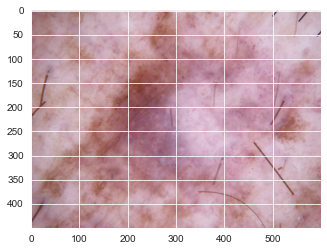

In [21]:
plt.imshow(X[1000])

In [22]:
y = np.array(imported_csv.drop(['image'],axis=1))
y.shape

(1757, 7)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=26, test_size=0.1)

In [24]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(450,600,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))

model.add(Dense(7, activation='softmax'))

2022-04-30 22:55:45.556507: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 448, 598, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 224, 299, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 297, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 148, 32)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 111, 148, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 146, 64)      1

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=30)

Epoch 1/15
53/53 [==============================] - 117s 2s/step - loss: 1.8454 - accuracy: 0.2302 - val_loss: 1.7256 - val_accuracy: 0.2045
Epoch 2/15
53/53 [==============================] - 120s 2s/step - loss: 1.7139 - accuracy: 0.3055 - val_loss: 1.6735 - val_accuracy: 0.3182
Epoch 3/15
53/53 [==============================] - 113s 2s/step - loss: 1.6410 - accuracy: 0.3238 - val_loss: 1.6941 - val_accuracy: 0.3523
Epoch 4/15
53/53 [==============================] - 116s 2s/step - loss: 1.5897 - accuracy: 0.3599 - val_loss: 1.6220 - val_accuracy: 0.3409
Epoch 5/15
53/53 [==============================] - 115s 2s/step - loss: 1.4983 - accuracy: 0.3953 - val_loss: 1.7463 - val_accuracy: 0.3523
Epoch 6/15
53/53 [==============================] - 117s 2s/step - loss: 1.4249 - accuracy: 0.4320 - val_loss: 1.5782 - val_accuracy: 0.3807
Epoch 7/15
53/53 [==============================] - 110s 2s/step - loss: 1.3422 - accuracy: 0.4744 - val_loss: 1.7683 - val_accuracy: 0.3750
Epoch 8/15
53

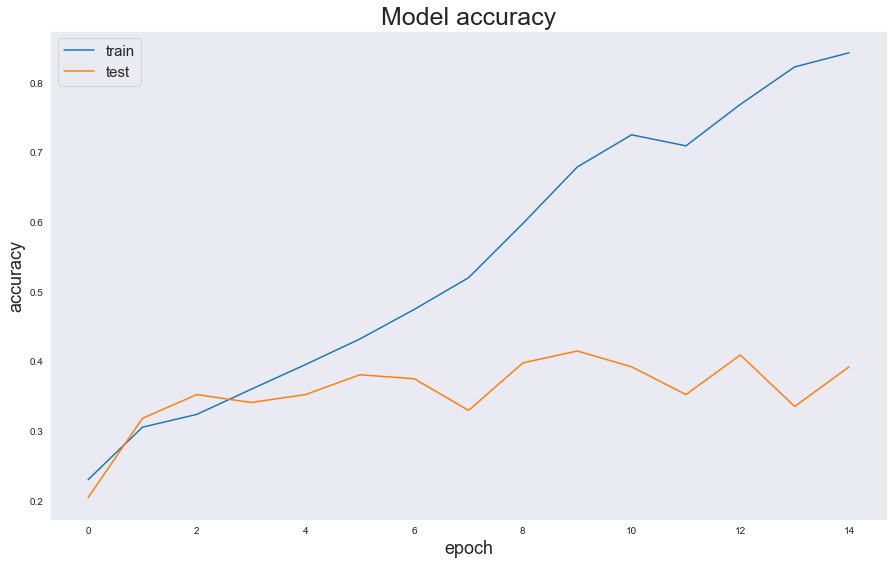

In [29]:
# summarize history for accuracy
fig = plt.figure(figsize = (15,9))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', fontsize=25)
plt.ylabel('accuracy', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left', fontsize=15)
plt.grid(False)
plt.show()
# plt.savefig('model_acc_unbalanced.png', transparent=True)

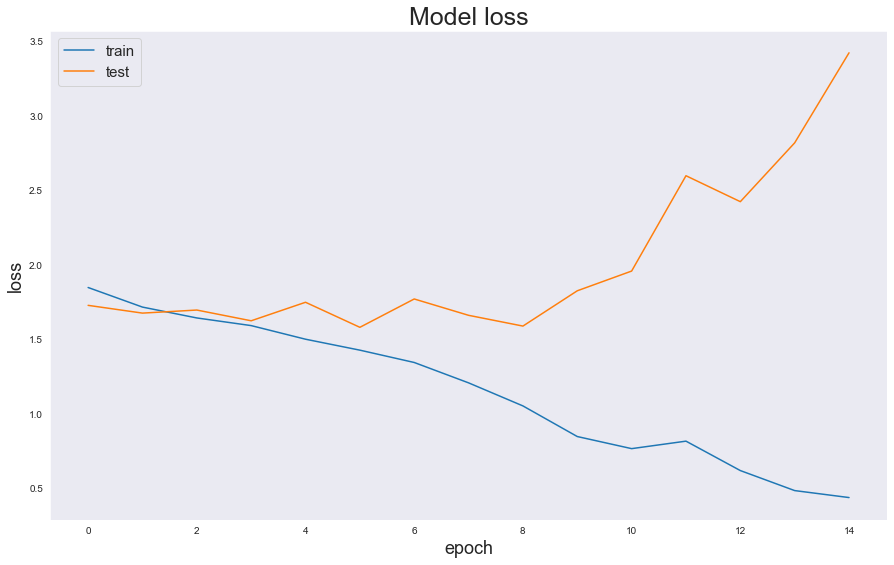

In [30]:
# summarize history for loss
fig = plt.figure(figsize = (15,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=25)
plt.ylabel('loss', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left', fontsize=15)
plt.grid(False)
plt.show()
# plt.savefig('model_loss_unbalanced.png', transparent=True)

In [31]:
y_pred = model.predict(X_test)
y_pred

array([[7.37990737e-02, 1.07851614e-04, 5.08783519e-01, ...,
        9.99617041e-04, 3.66498280e-05, 5.29349808e-09],
       [1.20090402e-03, 2.83179921e-04, 2.23244824e-05, ...,
        9.10135984e-01, 4.75863744e-05, 1.80804205e-10],
       [4.25513880e-03, 2.71281903e-03, 6.94543645e-02, ...,
        2.67805666e-01, 2.11725742e-01, 1.96040142e-04],
       ...,
       [9.99617696e-01, 1.87790602e-06, 1.30797825e-05, ...,
        7.57504779e-07, 2.89585467e-09, 4.10801636e-11],
       [9.77762509e-03, 3.07572503e-02, 4.41965610e-01, ...,
        3.50664437e-01, 5.07011525e-02, 2.03482136e-02],
       [9.97754633e-01, 7.36739967e-05, 4.67949540e-05, ...,
        2.03059823e-03, 7.82239204e-06, 2.84483126e-09]], dtype=float32)

In [32]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

In [34]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[15  6  1  0  6  0  1]
 [ 3 16  3  4  2  2  0]
 [ 5  2  6  5 10  7  0]
 [11  1  1 12 15  0  0]
 [ 5  1  0  2 13  0  0]
 [ 1  0  2  1  4  3  0]
 [ 0  1  2  0  3  0  4]]


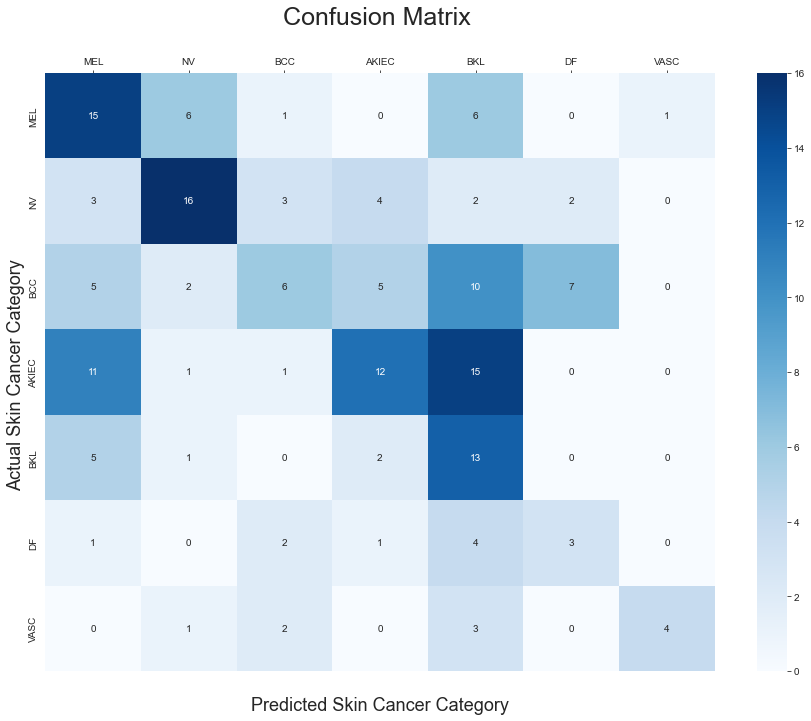

In [35]:
fig = plt.figure(figsize = (15,11))
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
sns.set(font_scale=2.0)
ax.set_title('Confusion Matrix \n', fontsize=25)
ax.set_xlabel('\nPredicted Skin Cancer Category', fontsize=18)
ax.set_ylabel('Actual Skin Cancer Category ', fontsize=18)
ax.xaxis.tick_top()

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['MEL','NV', 'BCC', 'AKIEC','BKL', 'DF', 'VASC'])
ax.yaxis.set_ticklabels(['MEL','NV', 'BCC', 'AKIEC','BKL', 'DF', 'VASC'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [36]:
target_names = ['MEL','NV', 'BCC', 'AKIEC','BKL', 'DF', 'VASC']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         MEL       0.38      0.52      0.43        29
          NV       0.59      0.53      0.56        30
         BCC       0.40      0.17      0.24        35
       AKIEC       0.50      0.30      0.37        40
         BKL       0.25      0.62      0.35        21
          DF       0.25      0.27      0.26        11
        VASC       0.80      0.40      0.53        10

    accuracy                           0.39       176
   macro avg       0.45      0.40      0.39       176
weighted avg       0.45      0.39      0.39       176

